In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, datasets,model_selection,metrics
import pandas as pd

In [2]:
data = datasets.load_iris()

In [3]:
x= data.data
y=data.target

In [4]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)

tree_model = tree.DecisionTreeClassifier(criterion='entropy',random_state=5,max_depth=4)
tree_model = tree_model.fit(xtrain,ytrain)
ypredtest = tree_model.predict(xtest)
ypredtrain = tree_model.predict(xtrain)
accytest = metrics.accuracy_score(ypredtest,ytest)
accytrain = metrics.accuracy_score(ypredtrain,ytrain)

print(accytest,accytrain)


0.9111111111111111 0.9809523809523809


[Text(0.4, 0.9, 'x[3] <= 0.7\nentropy = 1.585\nsamples = 105\nvalue = [35, 34, 36]'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.7, 'x[3] <= 1.75\nentropy = 0.999\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.4, 0.5, 'x[3] <= 1.45\nentropy = 0.406\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.6, 0.3, 'x[1] <= 2.6\nentropy = 0.779\nsamples = 13\nvalue = [0, 10, 3]'),
 Text(0.4, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.8, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [0, 9, 1]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

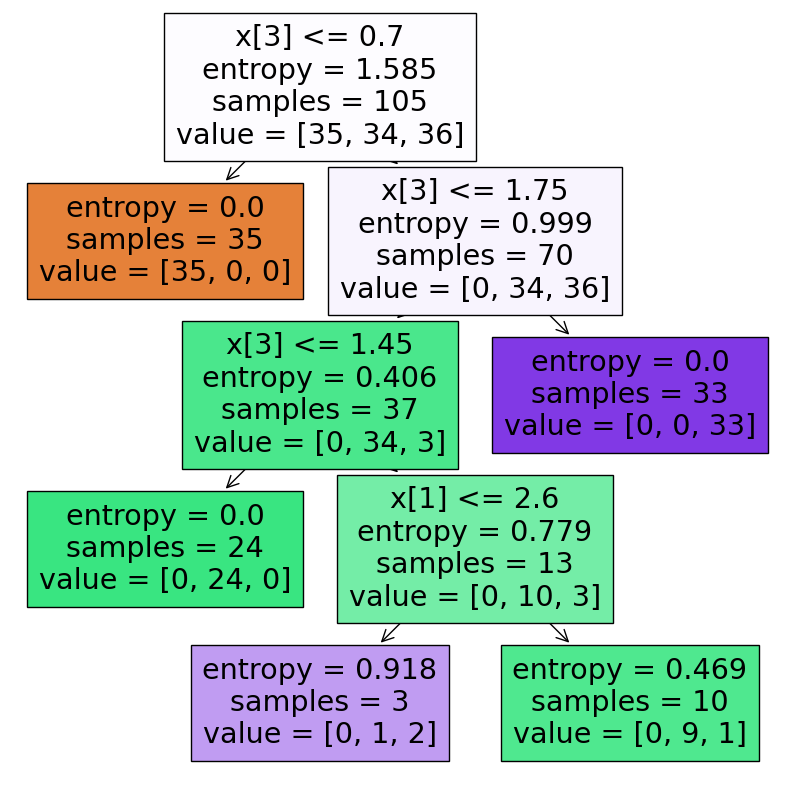

In [5]:
plt.figure(1,(10,10))
tree.plot_tree(tree_model,filled=True)

In [6]:
# data = pd.read_csv('/content/diabetes.csv')
# x = data.drop('Outcome',axis=1,inplace=False)
# y = data['Outcome']


FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes.csv'

In [ ]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)

tree_model = tree.DecisionTreeClassifier(criterion='entropy',random_state=5,max_depth=None)
tree_model = tree_model.fit(xtrain,ytrain)
ypredtest = tree_model.predict(xtest)
ypredtrain = tree_model.predict(xtrain)
accytest = metrics.accuracy_score(ypredtest,ytest)
accytrain = metrics.accuracy_score(ypredtrain,ytrain)

print(accytest,accytrain)

In [ ]:
plt.figure(1,(10,10))
tree.plot_tree(tree_model,filled=True)


In [ ]:
tree_model.get_depth()


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!unzip '/content/drive/MyDrive/database/orl_face.zip' -d '/content/drive/MyDrive/database/orl_face'

Archive:  /content/drive/MyDrive/database/orl_face.zip
replace /content/drive/MyDrive/database/orl_face/orl_face/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/database/orl_face/orl_face/.DS_Store  
replace /content/drive/MyDrive/database/orl_face/__MACOSX/orl_face/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/database/orl_face/__MACOSX/orl_face/._.DS_Store  
replace /content/drive/MyDrive/database/orl_face/orl_face/u1/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/database/orl_face/orl_face/u1/1.png  
replace /content/drive/MyDrive/database/orl_face/__MACOSX/orl_face/u1/._1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [40]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

# access any single image
usr_name = 24
samp_no = 6

path = "/content/drive/MyDrive/database/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)

# read the image
im = mimg.imread(path)
im_new = im[:,:,0]
print(im_new)
print(type(im))
# print(im)
print(im.shape)

# display the image
# plt.imshow(im,cmap='gray')

# plt.axis('off')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [26]:
# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

(112, 92)
(1, 10304)
range: 0.05490196 - 0.89411765


In [29]:
# logic to access all the samples of all
# the users
tot_samples = 400
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))

indx=-1
for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1
    # access any single image
    usr_name = i
    samp_no = j
    path = "/content/drive/MyDrive/database/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)
    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

(-0.5, 91.5, 111.5, -0.5)

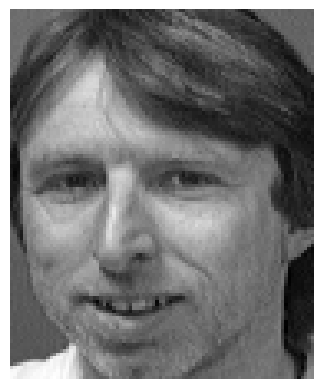

In [30]:
# display the image
plt.imshow(images[389,:,:],cmap='gray')
plt.axis('off')

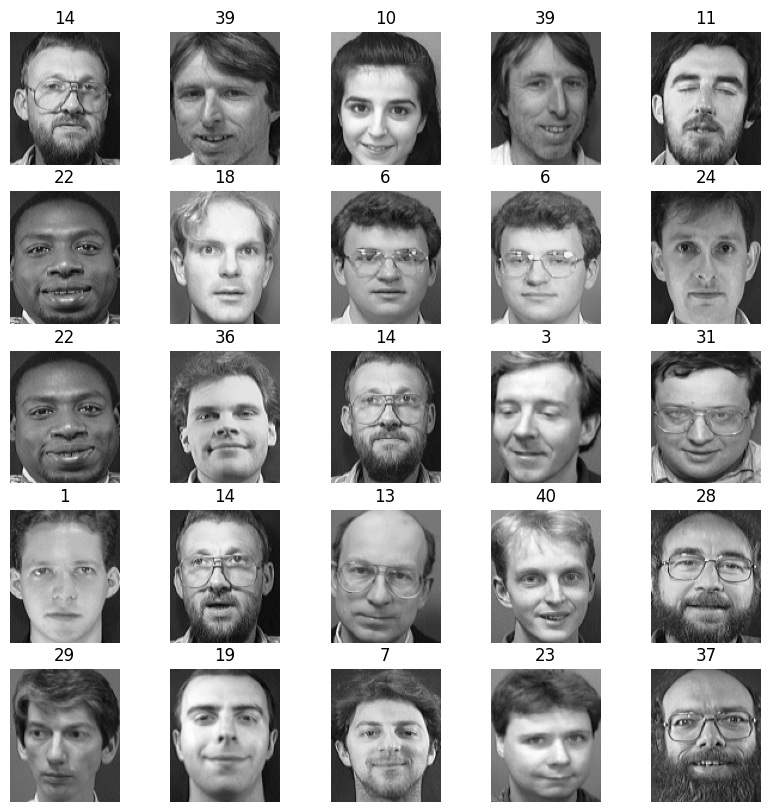

In [31]:
from random import randint

plt.figure(1,(10,10))
a=1
for i in range(25):
  user_name = randint(1,40)
  samp = randint(1,10)
  path = "/content/drive/MyDrive/database/orl_face/orl_face/u%d/%d.png"%(user_name,samp)
  im = mimg.imread(path)
  plt.subplot(5,5,a)
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  a=a+1
  plt.title(user_name)




In [32]:
x = data
y = label


In [33]:
from sklearn import svm
import pandas as pd
X = data.copy()
y = label.copy()


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    orl_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = orl_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(280, 10304) (280,)
(120, 10304) (120,)
[[0.94166667 0.94166667 0.94166667]
 [0.95       0.95       0.95      ]
 [0.88333333 0.95       0.95      ]]


,C=1,C=2,C=3
poly,0.941667,0.941667,0.941667
linear,0.950000,0.950000,0.950000
rbf,0.883333,0.950000,0.950000


In [ ]:
import joblib
# final best model
# kernel function - linear , C =1

orl_svm_model = svm.SVC(kernel='linear',gamma='scale',C=1)
# train the model
orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

# save the trained model
joblib.dump(orl_svm_model,'/content/drive/MyDrive/database/orl_face/orl_face_model.pkl')

Enter the user number:8
9


Text(0.5, 1.0, 'Query image')

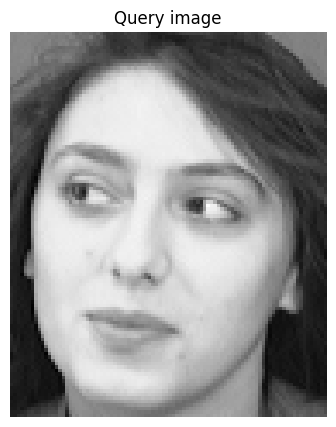

In [35]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

# load the query image
usrId = int(input("Enter the user number:"))
samp = np.random.randint(8,10) # selecting any random sample number
path = "/content/drive/MyDrive/database/orl_face/orl_face/u%d/%d.png"%(usrId,samp)

im = mimg.imread(path)
print(samp)
plt.figure(1,(5,5))
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title("Query image")

In [51]:
path = "/content/drive/MyDrive/database/brain_tumor/new_train/d(%d).png"%(i+1)

im = mimg.imread(path)


(512,)


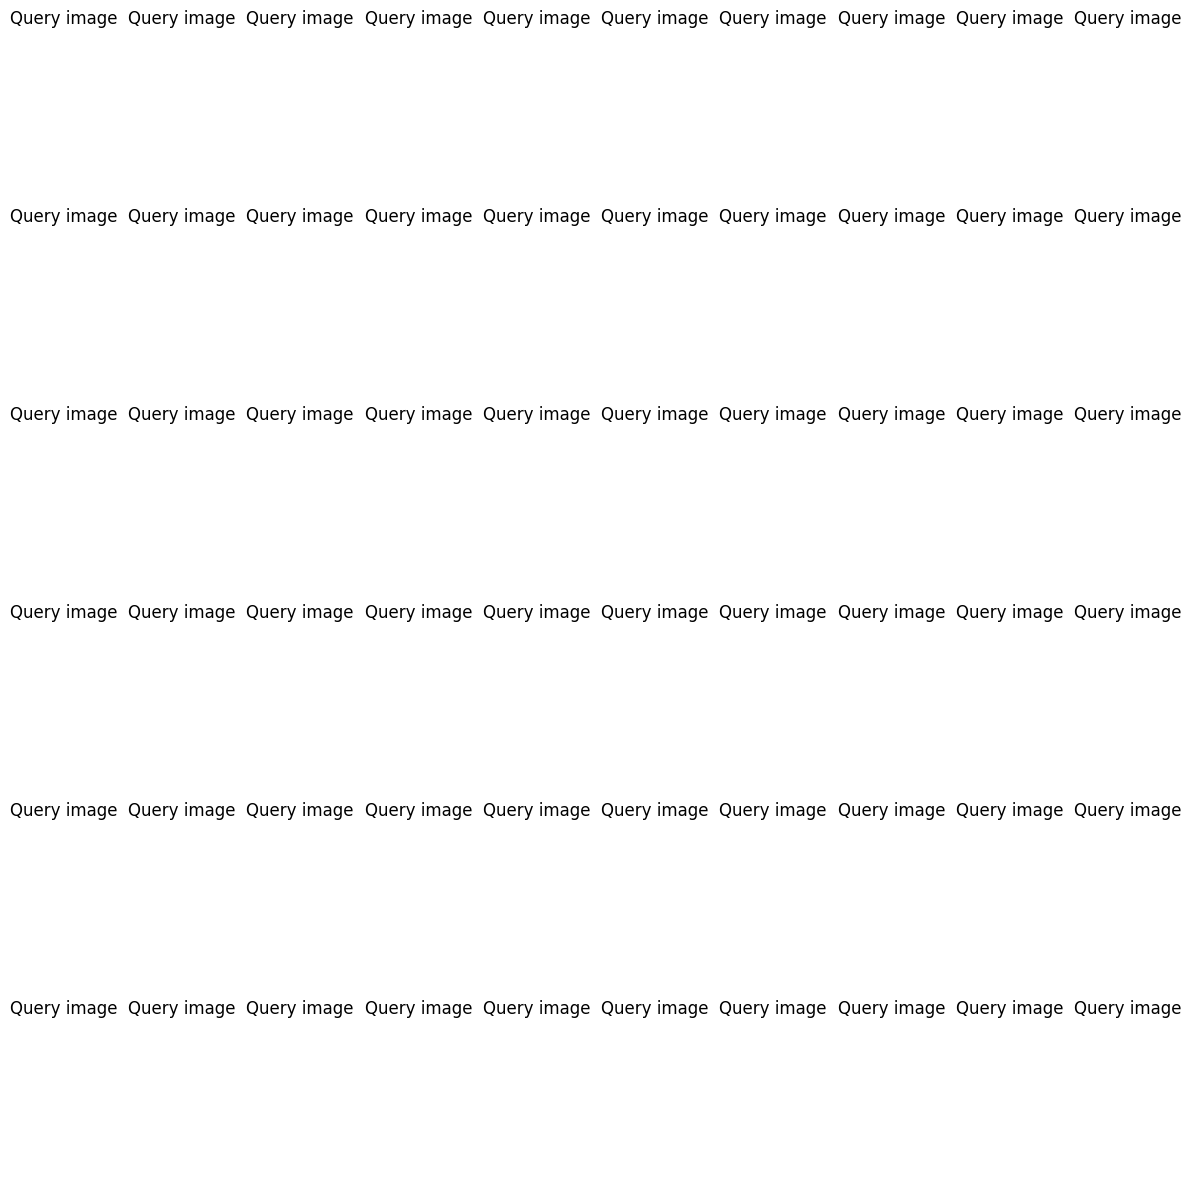

In [41]:
for i in range(60):
  path = "/content/drive/MyDrive/database/brain_tumor/new_train/d(%d).png"%(i+1)

  im = mimg.imread(path)

  plt.figure(1,(15,15))
  plt.subplot(6,10,i+1)
  # plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title("Query image")